[Inhaltsverzeichnis](../AP4.ipynb) | [ < zurück ](wohin?)|  [ > next](wohin?)

## 4.1.5 W.E.B. Windkraft

Angaben zu den Daten von Roman Prager (W.E.B.):
Die Windparks Neuhof befinden sich bei Parndorf. Neuhof I ist 2003 in Betrieb gegangen und war damals unser bester Windpark. Neuhof I besteht aus 9 Stück V80 2MW- Anlagen. Neuhof 2 ist 2005 in Betrieb gegangen, das sind 2x V90 2MW- Anlagen. Neuhof III sind V112- Anlagen mit 3MW. Bei diesem Windpark sollte man erkennen können, wie durch den Zubau und die entsprechende Abschattung Neuhof I spezifisch schlechter wird.

Maustrenk ist ein ziemlich freistehender Windpark im Weinviertel, bestehend aus 6x V90 2MW. 2010 ist eine 7. Anlage dazugekommen.

Sternwind I II und III sind drei Ausbaustufen des Windparks Sternwald in Oberösterreich. Diese verhalten sich wesentlich anders als die Windparks in Ostösterreich und könnten daher interessant sein.

In [2]:
# OPTIONAL: Load the "autoreload" extension so that code can change
from pathlib import Path
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [3]:
%matplotlib inline
import FLUCCOplus.notebooks as config
import FLUCCOplus.web as web
from FLUCCOplus.utils import *

FLUCCOplus.config  loaded!
FLUCCOplus.notebooks loaded!


### Analyse

In [4]:
path = config.DATA_PROCESSED / Path("WEB_normalized.csv")
df = web.read(path, decimal=",")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 81945 entries, 2011-01-01 00:00:00 to 2020-12-02 23:00:00
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Neuhof I    81945 non-null  float64
 1   Neuhof III  81945 non-null  float64
 2   Maustrenk   81945 non-null  float64
 3   STERN I     81945 non-null  float64
 4   STERN II    81945 non-null  float64
 5   STERN III   81945 non-null  float64
dtypes: float64(6)
memory usage: 4.4 MB


In [6]:
anzahl = len(df.columns)

In [7]:
correlation = np.zeros((len(df.index.year.unique()), anzahl, anzahl))

<AxesSubplot:>

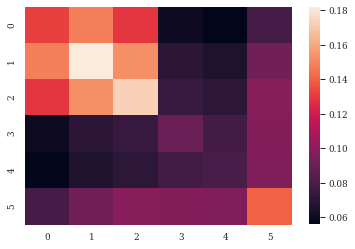

In [8]:
# c1 = correlation[1]

for y, year in enumerate(df.index.year.unique()):
    df_year = df[df.index.year == year]
    for c, col in enumerate(df_year.columns):
        for r, row in enumerate(df_year.columns):
            corr_ts = df_year[col] * df_year[row]
            correlation[y][c][r] = corr_ts.mean()


sns.heatmap(correlation[6])

In [9]:
s = np.zeros((anzahl, anzahl))
years = {y: None for y in df.index.year.unique()}

In [10]:
corr_df = pd.DataFrame(
    data=s,
    columns=df.columns,
    index=df.columns
)
# corr_df


In [11]:
for y, year in enumerate(df.index.year.unique()):
    df_year = df[df.index.year == year]
    years[year] = df_year.corr(method='pearson', min_periods=None)

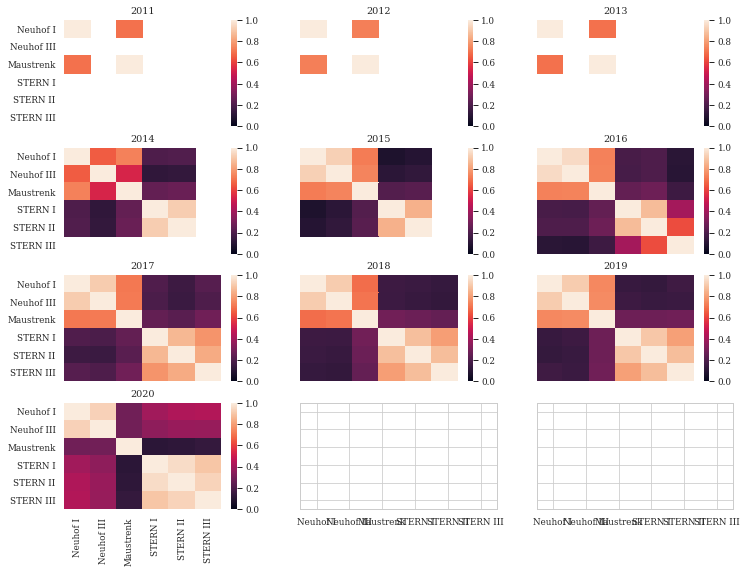

In [12]:
fig, axes = plt.subplots(4,3, figsize=(12,9), sharex=True, sharey=True)
axes = axes.flatten()

for i, year in enumerate(years.keys()):
    sns.heatmap(ax=axes[i], data=years[year], vmin=0, vmax=1)
    axes[i].set_title(year)
fig.savefig("correlate.png", dpi=300)

AttributeError: 'AxesSubplot' object has no property 'loc'

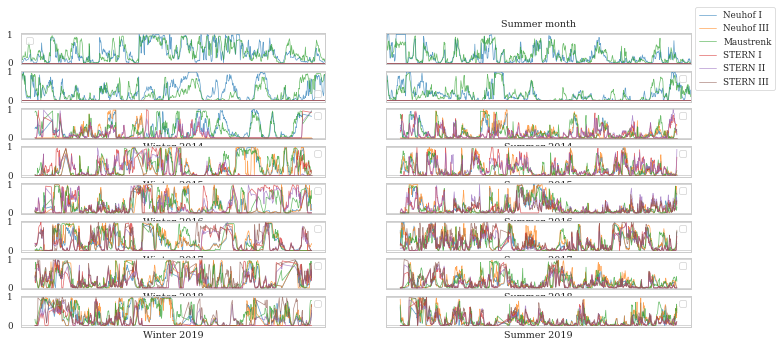

In [13]:
anlagen = ["Neuhof I", "Neuhof III", "Maustrenk",
           "STERN I", "STERN II", "STERN III"]


df_rm = df[anlagen]

years = ["2012","2013", "2014","2015","2016","2017","2018","2019"]
fig, axes = plt.subplots(len(years), 2, figsize=(12, 6))
#df_yearly[anlagen].plot(kind="bar")
for i, y in enumerate(years):
    for windpark in anlagen:

        df_rm.loc[y+"-1", [windpark]].plot(kind="line", alpha=0.7,xticks=[], sharey=True, ax=axes[i,0])

        df_rm.loc[y+"-7", [windpark]].plot(kind="line", alpha=0.7,xticks=[], sharey=True,ax=axes[i,1])
        axes[i,0].legend("")
        axes[i,1].legend("")
        axes[i,0].set(xlabel="Winter "+y)
        axes[i,1].set(xlabel="Summer "+y)

axes[0,-1].legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
axes[0,1].set(title="Summer month",loc="right", ylabel="")
axes[0,0].set(title="Winter month",loc="right", ylabel="MW")
#fig.tight_layout()
fig.savefig("img/normdetails.png", dpi=300)

In [20]:
test_year = df[df.index.year == 2018]


ModuleNotFoundError: No module named 'pyrqa'